<a href="https://colab.research.google.com/github/pikey-msc/DeepLearn/blob/master/Notebooks/RedesConvolucionalesTeor%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes Neuronales Convolucionales
Una de las redes más utilizadas en el campo de la Visión Artificial (y en muchos otros) son las redes
convolucionales (CNN por sus siglas en inglés Convolutional Neuronal Networks).
Realmente lo que ocurre en estas redes es que los pesos con los que se conecta una neurona con la
siguiente se repiten periódicamente y su operación puede recordar a cómo funciona un filtro. Los valores
de cada filtros son los que determina el algoritmo de aprendizaje. En el siguiente ejemplo se puede ver
su funcionamiento:

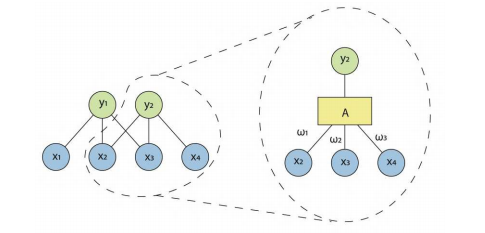

En este tipo de red se define $A$ como:
$$y_1 = A(x_1, x_2, x_3) = \sigma(ω_1x_1 + ω_2x_2 + ω_3x_3 + b)$$
$$y_2 = A(x_2, x_3, x_4) = \sigma(ω_1x_2 + ω_2x_3 + ω_3x_4 + b)$$

Como se puede ver, es igual que una Red Neuronal normal pero con los pesos repetidos. Se añade el vector $b$ (sesgo, bias en inglés) para tener en cuenta tendencias. Las componentes del vector $b$ también se aprenden. Realmente, como en el caso anterior, podría ser definido como una relación matricial con
la ecuación $y = \sigma(Wx)$ :

$$ \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}= \sigma \Bigg( \begin{bmatrix} \omega_1 & \omega_2 & \omega_3 & 0 \\ 0 & \omega_1 & \omega_2 & \omega_3   \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4   \end{bmatrix} + \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ b_4   \end{bmatrix}    \Bigg)$$

Generalizando para $n$ entradas y $m$ salidas, siendo $i$ el número de valores de la entrada de los que depende cada dato de salida:

$$ \begin{bmatrix} h_1 \\ h_2 \\ \vdots \\ h_m  \end{bmatrix}= \sigma \Bigg( \begin{bmatrix} \omega_1 & \omega_2 & \cdots & \omega_i & 0 &\cdots & 0 \\ 0 &\omega_1 & \omega_2 & \cdots & \omega_i & \cdots & 0 \\ 
0 & \cdots & 0 & \omega_1 & \cdots & \omega_{i-1} &  \omega_i   \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n   \end{bmatrix} + \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_n   \end{bmatrix}    \Bigg)$$

Siguiendo con el ejemplo, esta operación recuerda a una convolución. Efectivamente, como en las filas de la matriz $W$ se repiten valores, la operación $Wx$ es equivalente a la convolución $ω ∗ x$, siendo
un $ω$ un vector con los pesos $ω_1$, $ω_2$, $ω_3$.

En la siguiente imagen se puede ver la relación entre la operación convolución $(ω ∗ x)$ y la matricial ($Wx$).


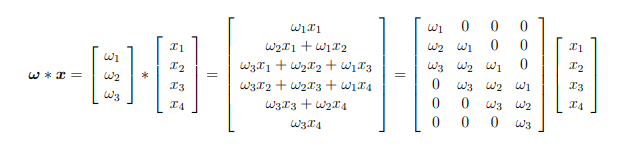

En realidad, en las CNN, para que el vector de salida se corresponda exactamente con la multiplicación Wx la operación correspondiente no es convolución completa, si no que solo se cogen la parte
central, de forma que el resultado tiene necesariamente el dominio correspondiente a la siguiente capa de datos. En el ejemplo, los dos valores centrales.

Sin embargo, por convenio, en la mayoría de paquetes de programación, en vez de utilizar la operación convolución entre los vectores $ω$ y $x$, calculan la correlación cruzada entre ambos vectores $(ω ⋆x)$.

Sin embargo, en la literatura, por comodidad, siempre se habla de convolución. 

Como se sabe, el primer paso de una convolución es la inversión del operador $h(t)$ por $h(−t)$, mientras que en una correlación cruzada se utiliza sin invertir. La relación entre las operaciones en los vectores ejemplo se muestra a
continuación.


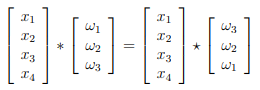

De esta forma, se ha demostrado que la operación lineal en las CNN se puede ver como una convolución y no como una multiplicación de matriz por vector. Este es un avance de las CNN, en las operaciones de convolución se pueden usar algunos herramientas de cálculo óptimo para reducir su tiempo de ejecución con respecto a la multiplicación de matrices.

Además, como se ha mencionado anteriormente, esta operación se puede comparar con la de un filtro en una imagen en 2D si se considera cada dato (bola) como el valor de un píxel (1 datos por píxel en cada imagen en blanco y negro y 3 por cada una en RGB). Un filtro se puede usar para detectar los bordes de
una imagen como muestra la siguiente figura:

**Ejemplo de un filtro**
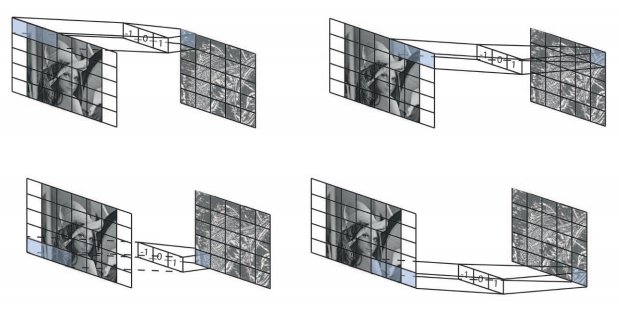

Si tenemos la figura:

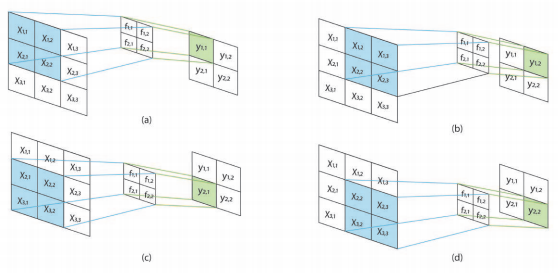

La imagen de tamaño 3 × 3 y un filtro de tamaño 2 × 2 como los de la figura 7 las componentes de la imagen de salida se podrían calcular como:
$$y_{1,1} = x_{1,1}f_{1,1} + x_{1,2}f_{1,2} + x_{2,1}f_{2,1} + x_{2,2}f_{2,2}$$
$$y_{1,2} = x_{1,2}f_{1,1} + x_{1,3}f_{1,2} + x_{2,2}f_{2,1} + x_{2,3}f_{2,2}$$
$$y_{2,1} = x_{2,1}f_{1,1} + x_{2,2}f_{1,2} + x_{3,1}f_{2,1} + x_{3,2}f_{2,2}$$
$$y_{2,2} = x_{2,2}f_{1,1} + x_{2,3}f_{1,2} + x_{3,2}f_{2,1} + x_{3,3}f_{2,2}$$

Que realmente es equivalente a una convolución por lo que se pueden aplicar todo lo anteriormente explicado para 1D.

A parte del tamaño del filtro, en las redes que se diseñen, hay que definir otros parámetros. Estos parámetros, a parte de deber ser utilizados dependiendo de la función que tiene el filtro, son importantes para definir el tamaño de la imagen de salida. En las figuras siguientes obtenidas de la primera se muestra su efecto. Por simplicidad, se muestran los cuatro primeros pasos, se ha omitido el filtro y sólo se muestra la imagen de entrada (azul) y la de salida (verde). Cuando se dice que se aplica con un valor n realmente
se considera que es n × n, si no es simétrico, se especifican los dos valores. Estos efectos son:

* Paso (*stride*): es lo que se avanza en cada paso del filtro, el valor normal es 1. Se puede ver en la figura siguiente **(1)** con valor 2.
* Relleno (*padding*): es la cantidad de píxeles que se añaden alrededor de la imagen original, por defecto se considera una orla de 0 píxeles. Su efecto se muestra en la figura **(2)** con valor 2.
* Dilatación (*dilatation*): es cada cuantos píxeles de la imagen original se cogen para pasar por el filtro, en la figura **(3)** con valor 2. Si se quiere que no tenga efecto debe de tener un valor de 1

Figura (1) – Cuatro primeros pasos de la aplicación de un filtro con paso 2 × 2.

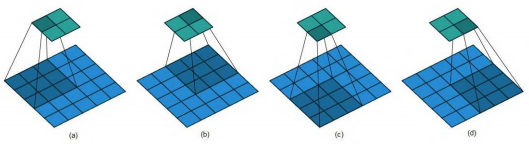

Figura (2) – Cuatro primeros pasos de la aplicación de un filtro con relleno 2 × 2

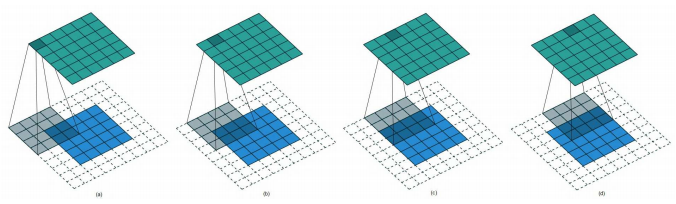

Figura (3) – Cuatro primeros pasos de la aplicación de un filtro con dilatación 2 × 2.

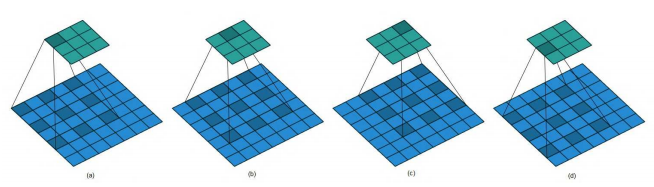

A parte de estas capas que se componen de una operación convolucional y una de activación, hay otro tipo de operaciones en las CNN que transforman la imagen y no se pueden comparar con filtros, son las llamadas capas de agrupación (*pooling* en inglés). Estas capas realizan una operación entre los
píxeles. Se pueden utilizar por ejemplo para calcular la media de los valores de grupo de píxeles en una imagen como en la figura (4) (agrupación por media, *Average Pooling*) o el mayor valor (agrupación por máximos, *Max Pooling*). En estas capas también se utilizan los conceptos de paso, relleno y dilatación.
Por tanto, se usan, para reducir la cantidad de información que se obtiene de la capa anterior.

Figura (4) – Agrupación por media de 3x3 con paso y dilatación de 1 y relleno de 0. Obtenido de la primera imagen

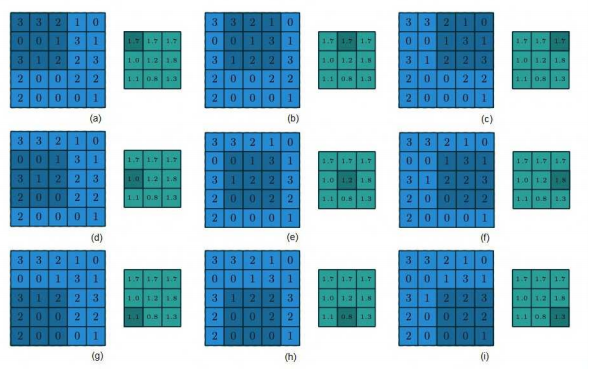

Finalmente, en última posición suele usarse una capa denominada de clasificación en las que se
calculan las probabilidades de pertenecer a una clase u otra. Es simplemente una capa con cada una de
las salidas conectadas con todas las entradas de la capa, por ello también suele llamarse capa totalmente
conectada (*fully connected layer* en inglés). Al llegar a estas capas normalmente los datos de los que se
dispone son características intermedias que han perdido las 2 dimensiones de las imágenes, por lo que
la entrada de esta capa es un vector. Además, estas capas no son convolucionales, funcionan como las
explicadas en la sección Redes Neuronales (NN), ya que todos sus pesos son distintos. Un ejemplo se
puede ver en la siguiente figura.


Ejemplo de una capa totalmente conectada

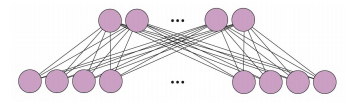